<a href="https://colab.research.google.com/github/kevinscaria/DeepLearning/blob/master/Tensorflow_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
!pip install -q kaggle
import zipfile
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection

## Eager Execution

*   Eager execution by default, means that the output of operations can be evaluated immediately 

*   This feature helps in debugging codes and models faster

*   Thus there is no need to define graphs and sessions, instead we can interact with TF line by line





In [ ]:
import tensorflow as tf

In [ ]:
#construction phase - build a graph
a = tf.Variable(3)
b = tf.Variable(4)

In [ ]:
#Eager execution - immediate answer
s = tf.add(a, b)
print(f'Sum of a and b is {s}')

Sum of a and b is 7


## Keras is default API


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
                             tf.keras.layers.Dense(32, activation=tf.nn.relu),
                             tf.keras.layers.Dense(16, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2455 - accuracy: 0.6686
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6247 - accuracy: 0.7808
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5251 - accuracy: 0.8106
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4436 - accuracy: 0.8413
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4043 - accuracy: 0.8547
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3750 - accuracy: 0.8644
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3587 - accuracy: 0.8687
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3427 - accuracy: 0.8756
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3358 - accuracy: 0.8782
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.322

In [ ]:
pred_labels = model.predict(test_images)
pred_labels = np.argmax(pred_labels, axis=1)

In [ ]:
print('Test Accuracy Score: ', accuracy_score(test_labels, pred_labels, ))
print('Test Recall Score: ', accuracy_score(test_labels, pred_labels))
print('Test Precision Score: ', accuracy_score(test_labels, pred_labels))
print('Test Confusion Matrix: \n', confusion_matrix(test_labels, pred_labels))

Test Accuracy Score:  0.858
Test Recall Score:  0.858
Test Precision Score:  0.858
Test Confusion Matrix: 
 [[846   1  11  44   2   2  73   0  21   0]
 [  8 956   2  26   3   0   2   0   3   0]
 [ 15   3 720  11 149   0  87   0  15   0]
 [ 37   6   4 891  20   0  31   0  11   0]
 [  0   1  56  48 821   0  59   0  15   0]
 [  0   0   0   0   0 976   1  19   2   2]
 [202   0  69  27 106   1 544   0  51   0]
 [  0   0   0   0   0  24   0 968   0   8]
 [  3   0   0   3   3  10   3   3 975   0]
 [  0   0   0   0   0  46   1  69   1 883]]


## Project 1

Convert Fahrenheit to Celsius using ANNs

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ADD YOUR KAGGLE USERNAME","key":"ADD YOUR API TOKEN"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d domnic/celsius-to-fahrenheit

  0% 0.00/72.9k [00:00<?, ?B/s]
100% 72.9k/72.9k [00:00<00:00, 29.6MB/s]


In [ ]:
with zipfile.ZipFile('/content/celsius-to-fahrenheit.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
train = pd.read_csv('/content/training.csv')
test = pd.read_csv('/content/testing.csv')

In [ ]:
train.head()

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0


In [ ]:
train.tail()

,Celsius,Fahrenheit
15995,833,1531.4
15996,757,1394.6
15997,1584,2883.2
15998,2396,4344.8
15999,0,32.0


In [ ]:
train.describe()

,Celsius,Fahrenheit
count,16000.000000,16000.000000
mean,1254.736062,2290.524913
std,726.338268,1307.408882
min,0.000000,32.000000
25%,627.750000,1161.950000
50%,1265.000000,2309.000000
75%,1891.000000,3435.800000
max,2500.000000,4532.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     16000 non-null  int64  
 1   Fahrenheit  16000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 250.1 KB


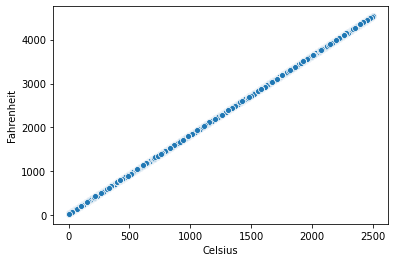

In [ ]:
sns.scatterplot(train['Celsius'], train['Fahrenheit']);

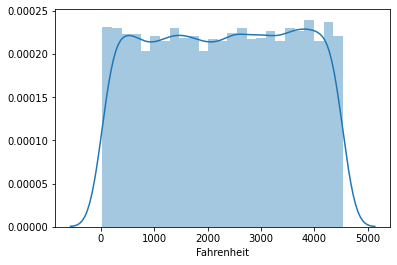

In [ ]:
sns.distplot(train['Fahrenheit']);

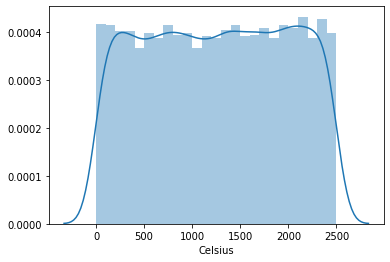

In [ ]:
sns.distplot(train['Celsius']);

In [ ]:
X_train, X_test, y_train, y_test = train['Celsius'], test['Celsius'], train['Fahrenheit'], test['Fahrenheit']

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = [1]))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
400/400 [==============================] - 0s 1ms/step - loss: 4175503.2500 - val_loss: 159309.8438
Epoch 2/100
400/400 [==============================] - 0s 966us/step - loss: 23169.6992 - val_loss: 247.1978
Epoch 3/100
400/400 [==============================] - 0s 992us/step - loss: 218.1775 - val_loss: 212.0735
Epoch 4/100
400/400 [==============================] - 0s 970us/step - loss: 214.5538 - val_loss: 211.4915
Epoch 5/100
400/400 [==============================] - 0s 981us/step - loss: 213.8293 - val_loss: 210.6490
Epoch 6/100
400/400 [==============================] - 0s 970us/step - loss: 212.9353 - val_loss: 209.6275
Epoch 7/100
400/400 [==============================] - 0s 994us/step - loss: 211.7952 - val_loss: 208.7866
Epoch 8/100
400/400 [==============================] - 0s 965us/step - loss: 210.4035 - val_loss: 206.8531
Epoch 9/100
400/400 [==============================] - 0s 967us/step - loss: 208.7350 - val_loss: 204.9438
Epoch 10/100
400/400 [========

In [ ]:
model.evaluate(X_train, y_train)

500/500 [==============================] - 0s 677us/step - loss: 2.8411e-06


2.8411427592800464e-06

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

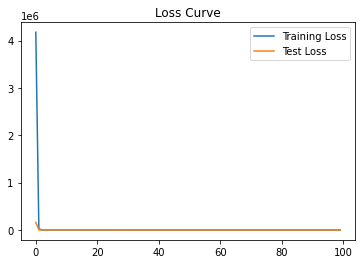

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve')
plt.legend(['Training Loss', 'Test Loss']);

In [ ]:
#Model Weights
model.get_weights()

[array([[1.7999977]], dtype=float32), array([32.002953], dtype=float32)]

In [ ]:
C = 5

#Empirical Relation Found by ANN
F = np.round(np.round(model.get_weights()[0][0][0], 2)*C + np.round(model.get_weights()[1][0], 2), 1)
print(f'Celsius: {C} ---> Farenheit: {F} using ANN')

#Relation Found by Mathematical Formula
F = (9/5)*C + 32
print(f'Celsius: {C} ---> Farenheit: {F} using mathematical formula')

Celsius: 5 ---> Farenheit: 41.0 using ANN
Celsius: 5 ---> Farenheit: 41.0 using mathematical formula


## Project 2

Predicting sales from outside temperature

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving SalesData.csv to SalesData.csv


{'SalesData.csv': b'Temperature,Revenue\r\n24.56688442,534.7990284\r\n26.00519115,625.1901215\r\n27.79055388,660.6322888\r\n20.59533505,487.7069603\r\n11.50349764,316.2401944\r\n14.35251388,367.9407438\r\n13.70777988,308.8945179\r\n30.83398474,696.7166402\r\n0.976869989,55.39033824\r\n31.66946458,737.8008241\r\n11.45525338,325.9684084\r\n3.664669577,71.16015301\r\n18.81182403,467.4467066\r\n13.62450892,289.5409341\r\n39.53990899,905.4776043\r\n18.48314099,469.9090332\r\n25.93537514,648.2099977\r\n42.51528041,921.508275\r\n29.58948056,649.5611747\r\n21.77594799,534.6228653\r\n25.45783637,612.1539491\r\n15.21456942,353.3256334\r\n22.61931574,524.2361154\r\n16.25872074,374.231135\r\n23.88172478,523.1245467\r\n18.97830025,473.6043349\r\n15.6614643,402.4553204\r\n29.18504465,679.3177906\r\n19.02461092,517.5340283\r\n35.12015142,809.6720534\r\n24.18393726,528.3804165\r\n15.23119012,356.0980075\r\n8.790952808,237.7639106\r\n18.23322784,418.1372788\r\n35.62892497,809.4634112\r\n37.05754246,870

In [ ]:
sd = pd.read_csv('/content/SalesData.csv')
sd.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


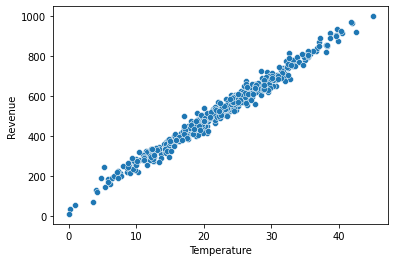

In [ ]:
sns.scatterplot(sd['Temperature'], sd['Revenue'])
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = [1]))

In [ ]:
model.compile(optimizer= tf.optimizers.Adam(0.1), loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X, Y = sd['Temperature'], sd['Revenue']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 2020)

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000
10/10 [==============================] - 0s 10ms/step - loss: 279924.1562 - val_loss: 252305.9219
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 255189.0312 - val_loss: 228727.5469
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 230984.6250 - val_loss: 206963.6562
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 208876.2969 - val_loss: 186580.7656
Epoch 5/1000
10/10 [==============================] - 0s 3ms/step - loss: 188142.3438 - val_loss: 167738.2500
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 169269.3594 - val_loss: 150193.9062
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 151742.2656 - val_loss: 134070.3438
Epoch 8/1000
10/10 [==============================] - 0s 3ms/step - loss: 135637.4844 - val_loss: 119337.8750
Epoch 9/1000
10/10 [==============================] - 0s 3ms/step - loss: 120785.3906 - val_loss: 105980.2656
Epoch 10/

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

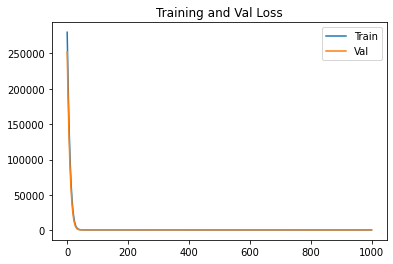

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Val Loss')
plt.legend(['Train', 'Val']);

In [ ]:
model.get_weights()

[array([[21.438772]], dtype=float32), array([45.2279], dtype=float32)]

In [ ]:
pred_test = model.predict(X_test)

In [ ]:
print('R2 Score: ', metrics.r2_score(y_test, pred_test))
print('MSE Score: ', metrics.mean_squared_error(y_test, pred_test))

R2 Score:  0.9829271749393901
MSE Score:  514.1746614229111


## Project 3